In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv("dirty_cafe_sales.csv")
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [197]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [198]:
df.shape

(10000, 8)

In [201]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

### Conclusion
- 1.Transaction ID has no Null or NaN or Empty Values
- 2. Item, Quantity, Price Per Unite, Total Spent, Payment Method,Location, and Transaction Date all have Null Values
- 3. All the columns are of the type object which we need to fix Let's see how we are going to deal with each one of these

### First let's deal with the empty values in the Item Column, Since we have a Price Per Unite we can deduce what item that was

In [202]:
# let's make price Dicts
item_price = {
    'Coffee': 2.0,
    'Tea': 1.5,
    'Sandwich': 4.0,
    'Salad': 3.0,
    'Cake': 3.0,
    'Cookie': 1.0,
    'Smoothie': 4.0,
    'Juice': 3.0
}

# Reverse Mapping (Price to item)
price_item = {price : item for item, price in item_price.items()}

df["Item"] = df["Item"].fillna(df["Price Per Unit"].map(price_item))

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


### Looking at the data nothing changed , Becoz ,the Data type in column Price Per Unit is Object and that needs to converted to float!

In [204]:
try:
    df["Price Per Unit"] = df["Price Per Unit"].astype(float)
except Exception as e:
    print(e)

could not convert string to float: 'ERROR'


Can you spot the error?
Click to see the Answer
There is a value in column 'Price Per Unit' that is a string 'ERROR' so let's fix that
1. We are going to use numpy and import it as np to get the NaN value from it
2. We are going to replace the word ERROR and UNKNOWN with np.nan

In [205]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
UNKNOWN     164
Name: count, dtype: int64

In [206]:
df["Price Per Unit"] = df["Price Per Unit"].replace(["ERROR","UNKNOWN"], np.nan)

df["Price Per Unit"] = df["Price Per Unit"].astype(float)

df.describe()

,Price Per Unit
count,9467.000000
mean,2.949984
std,1.278450
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


### Now we can see the Data type for the column Price Per Unit to be float!

In [207]:
df["Item"] = df["Item"].fillna(df["Price Per Unit"].map(price_item))

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9939 non-null   object 
 2   Quantity          9862 non-null   object 
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9827 non-null   object 
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


In [209]:
df[df["Item"].isnull()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
100,TXN_9517146,NaN,5,5.0,25.0,Cash,Takeaway,2023-10-30
151,TXN_4031509,NaN,4,NaN,16.0,Credit Card,Takeaway,2023-01-04
289,TXN_3495950,NaN,4,NaN,6.0,Credit Card,In-store,2023-02-19
334,TXN_2523298,NaN,4,NaN,6.0,ERROR,In-store,2023-03-25
818,TXN_7940202,NaN,1,NaN,4.0,Digital Wallet,NaN,2023-07-23
...,...,...,...,...,...,...,...,...
9717,TXN_3334632,NaN,1,NaN,2.0,Credit Card,Takeaway,2023-11-20
9788,TXN_4600894,NaN,5,5.0,25.0,Digital Wallet,NaN,2023-09-17
9819,TXN_1208561,NaN,ERROR,NaN,20.0,Credit Card,NaN,2023-08-19
9820,TXN_8751702,NaN,5,NaN,15.0,Cash,NaN,2023-02-13


### After filling it up it seems we have around 61 missing values and that's because the column 'Price Per Unit' has value NaN as well as 'Item' column

Since we now can't find the Item Sold we are going to try two different methods: 
- 1. We are going to determine the 'Price Per Unit' by deviding the 'Total Spent' by 'Quantity'
- 2. Drop all the null values in the column Item But let's first convert them both to float!

In [210]:
df["Total Spent"] = df["Total Spent"].replace(["UNKNOWN","ERROR"], np.nan)
df["Total Spent"] = df["Total Spent"].astype(float)

In [211]:
df["Quantity"] = df["Quantity"].replace(["UNKNOWN","ERROR"], np.nan)
df["Quantity"] = df["Quantity"].astype(float)

#### Filling the null value in column Price Per Unit

In [212]:
df["Price Per Unit"] = df["Price Per Unit"].fillna(df['Total Spent']/df['Quantity'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9939 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9962 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


### Now let's retry to fill Item Column

In [213]:
df["Item"] = df["Item"].fillna(df["Price Per Unit"].map(price_item))

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9960 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9962 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


### We still have missing items and since we can't possible determine what are these items we are going to drop them

In [215]:
df.dropna(subset=["Item"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9960 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9960 non-null   object 
 1   Item              9960 non-null   object 
 2   Quantity          9484 non-null   float64
 3   Price Per Unit    9924 non-null   float64
 4   Total Spent       9460 non-null   float64
 5   Payment Method    7391 non-null   object 
 6   Location          6712 non-null   object 
 7   Transaction Date  9801 non-null   object 
dtypes: float64(3), object(5)
memory usage: 700.3+ KB


In [216]:
df["Quantity"] =df["Quantity"].fillna((df["Total Spent"] / df["Price Per Unit"]))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9960 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9960 non-null   object 
 1   Item              9960 non-null   object 
 2   Quantity          9923 non-null   float64
 3   Price Per Unit    9924 non-null   float64
 4   Total Spent       9460 non-null   float64
 5   Payment Method    7391 non-null   object 
 6   Location          6712 non-null   object 
 7   Transaction Date  9801 non-null   object 
dtypes: float64(3), object(5)
memory usage: 700.3+ KB


#### Moving on to the column 'Transaction Date' it's a vital column and we need it and since we can't possibly get the date we are going to drop any null values

In [217]:
df.dropna(subset= ["Transaction Date"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9801 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9801 non-null   object 
 1   Item              9801 non-null   object 
 2   Quantity          9765 non-null   float64
 3   Price Per Unit    9767 non-null   float64
 4   Total Spent       9310 non-null   float64
 5   Payment Method    7280 non-null   object 
 6   Location          6607 non-null   object 
 7   Transaction Date  9801 non-null   object 
dtypes: float64(3), object(5)
memory usage: 689.1+ KB


### We can still see some missing values in the 'Price Per Unit' column we can use the same approach we used on the 'Item' column but using item_price dictionary this time

In [218]:
df["Price Per Unit"] = df["Price Per Unit"].fillna(df["Item"].map(item_price))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9801 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9801 non-null   object 
 1   Item              9801 non-null   object 
 2   Quantity          9765 non-null   float64
 3   Price Per Unit    9797 non-null   float64
 4   Total Spent       9310 non-null   float64
 5   Payment Method    7280 non-null   object 
 6   Location          6607 non-null   object 
 7   Transaction Date  9801 non-null   object 
dtypes: float64(3), object(5)
memory usage: 689.1+ KB


### we still have some null values in the 'Price Per Unit' column let's take a closer look by only seeing the null values in the 'Price Per Unit' column

In [219]:
df[df["Price Per Unit"].isna()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2289,TXN_7524977,UNKNOWN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
3779,TXN_7376255,UNKNOWN,NaN,NaN,25.0,NaN,In-store,2023-05-27
4152,TXN_9646000,ERROR,2.0,NaN,NaN,NaN,In-store,2023-12-14
7597,TXN_1082717,ERROR,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13


### Some of the items were signed as UNKNOWN and ERROR so let's drop them

In [220]:
df = df[~df['Item'].isin(['ERROR', 'UNKNOWN'])]

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9175 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9175 non-null   object 
 1   Item              9175 non-null   object 
 2   Quantity          9141 non-null   float64
 3   Price Per Unit    9175 non-null   float64
 4   Total Spent       8723 non-null   float64
 5   Payment Method    6819 non-null   object 
 6   Location          6192 non-null   object 
 7   Transaction Date  9175 non-null   object 
dtypes: float64(3), object(5)
memory usage: 645.1+ KB


In [222]:
df[df["Total Spent"].isnull()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
25,TXN_7958992,Smoothie,3.0,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
42,TXN_6650263,Tea,2.0,1.5,NaN,NaN,Takeaway,2023-01-10
65,TXN_4987129,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
94,TXN_6289610,Juice,3.0,3.0,NaN,Cash,Takeaway,2023-08-07
...,...,...,...,...,...,...,...,...
9890,TXN_2749289,Smoothie,2.0,4.0,NaN,Digital Wallet,Takeaway,2023-05-05
9893,TXN_3809533,Juice,2.0,3.0,NaN,Digital Wallet,Takeaway,2023-02-02
9954,TXN_1191659,Coffee,4.0,2.0,NaN,Credit Card,In-store,2023-11-21
9977,TXN_5548914,Juice,2.0,3.0,NaN,Digital Wallet,In-store,2023-11-04


In [223]:
df["Total Spent"] = df["Total Spent"].fillna(df["Quantity"] * df["Price Per Unit"])

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\2827405306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Spent"] = df["Total Spent"].fillna(df["Quantity"] * df["Price Per Unit"])


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9175 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9175 non-null   object 
 1   Item              9175 non-null   object 
 2   Quantity          9141 non-null   float64
 3   Price Per Unit    9175 non-null   float64
 4   Total Spent       9155 non-null   float64
 5   Payment Method    6819 non-null   object 
 6   Location          6192 non-null   object 
 7   Transaction Date  9175 non-null   object 
dtypes: float64(3), object(5)
memory usage: 645.1+ KB


### There is NUll Values in the "Quntity" and "Total Spent" so thats why we can't calculates the values of this column , so we are going to drop it 

In [225]:
df.dropna(subset=["Quantity"], inplace=True)

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\3802355222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Quantity"], inplace=True)


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9141 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9141 non-null   object 
 1   Item              9141 non-null   object 
 2   Quantity          9141 non-null   float64
 3   Price Per Unit    9141 non-null   float64
 4   Total Spent       9141 non-null   float64
 5   Payment Method    6793 non-null   object 
 6   Location          6168 non-null   object 
 7   Transaction Date  9141 non-null   object 
dtypes: float64(3), object(5)
memory usage: 642.7+ KB


In [263]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\3866579464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")


In [268]:
df.dropna(subset=["Transaction Date"],inplace=True)

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\1133401167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Transaction Date"],inplace=True)


In [273]:
df["day"] = df.loc[:, 'Transaction Date'].dt.day
df["month"] = df.loc[:, 'Transaction Date'].dt.month
df["year"] = df.loc[:, 'Transaction Date'].dt.year

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\873732564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df.loc[:, 'Transaction Date'].dt.day
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\873732564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.loc[:, 'Transaction Date'].dt.month
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\873732564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8857 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8857 non-null   object        
 1   Item              8857 non-null   object        
 2   Quantity          8857 non-null   float64       
 3   Price Per Unit    8857 non-null   float64       
 4   Total Spent       8857 non-null   float64       
 5   Payment Method    6595 non-null   object        
 6   Location          5967 non-null   object        
 7   Transaction Date  8857 non-null   datetime64[ns]
 8   day               8857 non-null   int32         
 9   month             8857 non-null   int32         
 10  year              8857 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(4)
memory usage: 726.6+ KB


In [275]:
df = df.copy()

## Sales and Revenue Analysis

In [235]:
total_Revenue_each_item = df.groupby("Item")["Total Spent"].sum().reset_index()
total_Revenue_each_item = total_Revenue_each_item.sort_values(by="Total Spent",ascending=False)
total_Revenue_each_item

,Item,Total Spent
4,Salad,17080.0
6,Smoothie,14136.0
5,Sandwich,13512.0
3,Juice,11178.0
0,Cake,10185.0
1,Coffee,7242.0
7,Tea,4972.5
2,Cookie,3288.0


C:\Users\Abhijit\AppData\Local\Temp\ipykernel_17044\307328909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= total_Revenue_each_item , x = "Item", y = "Total Spent", palette="Reds")


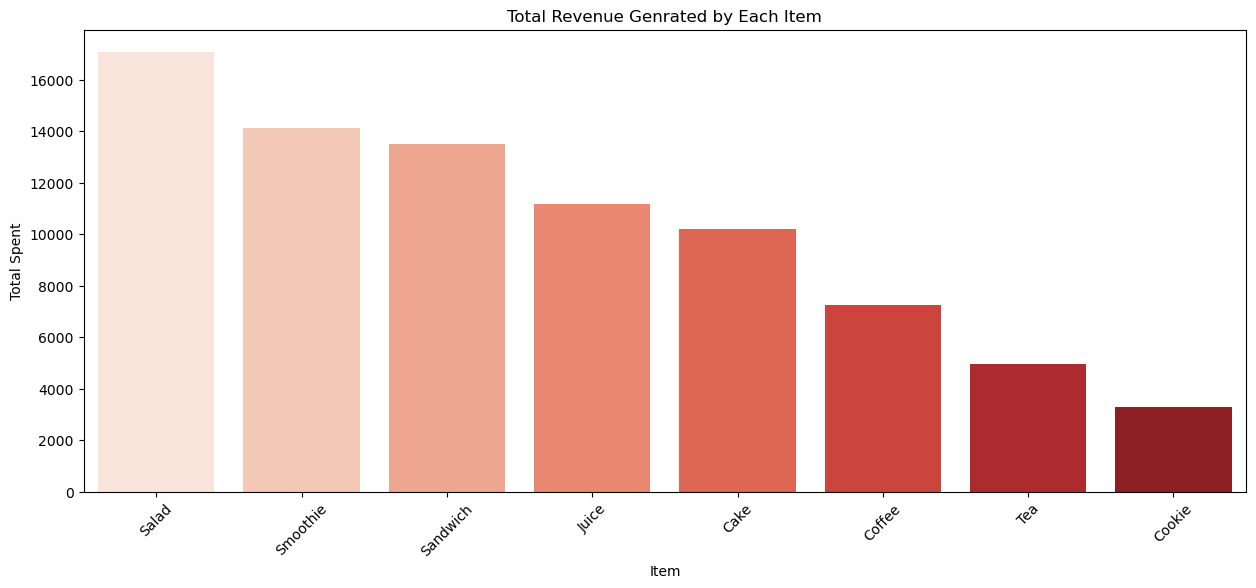

In [244]:
plt.figure(figsize=(15,6))
sns.barplot(data= total_Revenue_each_item , x = "Item", y = "Total Spent", palette="Reds")
plt.title("Total Revenue Genrated by Each Item")
plt.xlabel("Item")
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

### Most Orderd Item


In [254]:
most_orderd_item =df.groupby("Item")["Quantity"].sum().reset_index()
most_orderd_item 

,Item,Quantity
0,Cake,3395.0
1,Coffee,3621.0
2,Cookie,3288.0
3,Juice,3726.0
4,Salad,3418.0
5,Sandwich,3378.0
6,Smoothie,3534.0
7,Tea,3315.0


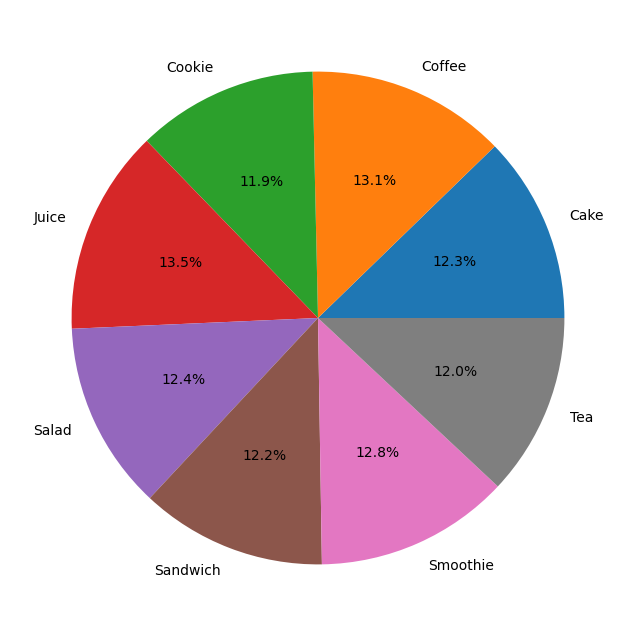

In [261]:
plt.figure(figsize=(8,8))
plt.pie(most_orderd_item['Quantity'], labels=most_orderd_item['Item'], autopct='%1.1f%%')
plt.show()

In [278]:
df["month_name"] = df["Transaction Date"].dt.month_name()
df["day_name"] = df["Transaction Date"].dt.day_name()

### revenue trends across different months

In [291]:
revenue_by_month = df.groupby(df["month_name"])["Total Spent"].sum().reset_index()
revenue_by_month.sort_values(by="Total Spent", ascending =False)

,month_name,Total Spent
10,October,6914.5
6,June,6891.0
4,January,6808.0
2,December,6698.5
0,April,6678.5
7,March,6649.5
9,November,6553.0
1,August,6535.5
8,May,6431.0
11,September,6412.5


In [290]:
revenue_by_day = df.groupby(df["day_name"])["Total Spent"].sum().reset_index()
revenue_by_day.sort_values(by="Total Spent", ascending=False)

,day_name,Total Spent
0,Friday,11659.0
3,Sunday,11562.0
4,Thursday,11467.0
5,Tuesday,11232.5
1,Monday,11222.5
2,Saturday,11116.0
6,Wednesday,10747.5


In [296]:
df.groupby(["month_name","Item"])["Total Spent"].sum().reset_index()

,month_name,Item,Total Spent
0,April,Cake,816.0
1,April,Coffee,542.0
2,April,Cookie,228.0
3,April,Juice,1002.0
4,April,Salad,1460.0
...,...,...,...
91,September,Juice,804.0
92,September,Salad,1180.0
93,September,Sandwich,1128.0
94,September,Smoothie,1268.0
